##### IMPORT

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#df=pd.read_csv(r'C:\Users\61406\Dropbox\PYTHON\modified_results.csv', header=[0,1])
#df.columns = [col.strip() for col in df.columns.get_level_values(0)]

#df

#### Data

In [2]:
df=pd.read_csv(r'C:\Users\61406\Dropbox\PYTHON\modified_results.csv', header=[0,1])
df.columns = [col.strip() for col in df.columns.get_level_values(0)]

df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q25,Q40,Q38,Block,SASSY,avg belief in BoM,avg belief in anthropogenic climate change,avg belief in climate scientists,avg belief in pro-environmental behaviours,populism
0,13/03/2024 12:33,13/03/2024 12:35,0,120.151.246.224,100,121,1,13/03/2024 12:35,R_4odwY4TPOwXAriF,NaN,...,3,2,Thanks for caring for the environment,4,1,3.333333,3.666667,2.666667,3.666667,3.0
1,12/03/2024 19:39,12/03/2024 19:41,0,180.200.195.84,100,122,1,12/03/2024 19:41,R_4lwxZtYatql0jbX,NaN,...,4,2,I enjoyed myself thank you very much,1,3,3.333333,2.666667,3.333333,4.000000,3.0
2,11/03/2024 16:10,11/03/2024 16:12,0,1.145.58.212,100,124,1,11/03/2024 16:12,R_40qqcrBOeTxVpQ5,NaN,...,4,2,NaN,3,2,3.333333,3.000000,3.333333,4.000000,3.0
3,12/03/2024 12:20,12/03/2024 12:22,0,120.16.25.236,100,125,1,12/03/2024 12:22,R_4FsaesW4qZv6yGx,NaN,...,2,3,N/a,4,3,4.333333,2.666667,3.666667,2.333333,3.5
4,8/03/2024 19:41,8/03/2024 19:43,0,120.16.91.240,100,127,1,8/03/2024 19:43,R_4gI57srtZ9FKlwK,NaN,...,4,3,NaN,3,3,2.666667,2.666667,3.666667,3.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,12/03/2024 12:07,12/03/2024 13:03,0,103.231.89.170,100,3361,1,12/03/2024 13:03,R_4Aj2zEKaKKDouvn,NaN,...,4,5,evidence for man induced climate warming is co...,1,2,3.333333,2.333333,3.666667,4.000000,4.5
466,11/03/2024 15:42,11/03/2024 16:44,0,1.123.234.40,100,3734,1,11/03/2024 16:44,R_4H13SsX7iMtgUXR,NaN,...,3,3,NaN,4,5,4.666667,3.666667,4.000000,2.333333,3.5
467,8/03/2024 19:52,8/03/2024 21:00,0,120.159.1.52,100,4076,1,8/03/2024 21:00,R_4MM0Wn7UXTLAHuU,NaN,...,2,4,i dont know,2,2,2.666667,3.333333,2.666667,2.000000,3.0
468,8/03/2024 21:44,8/03/2024 23:31,0,111.220.95.30,100,6431,1,8/03/2024 23:31,R_4KHLKgvzPT9VXjG,NaN,...,3,3,none,1,3,3.000000,3.000000,3.000000,3.000000,3.0


In [3]:
df= df.rename(columns={'avg belief in BoM': 'Belief in BoM',
                        'avg belief in anthropogenic climate change': 'Belief in Anthropogenic Climate Change',
                        'avg belief in climate scientists': 'Belief in Climate Scientists',
                        'avg belief in pro-environmental behaviours': 'Belief in Pro-environmental Behaviours'})


#### Plot x SASSY

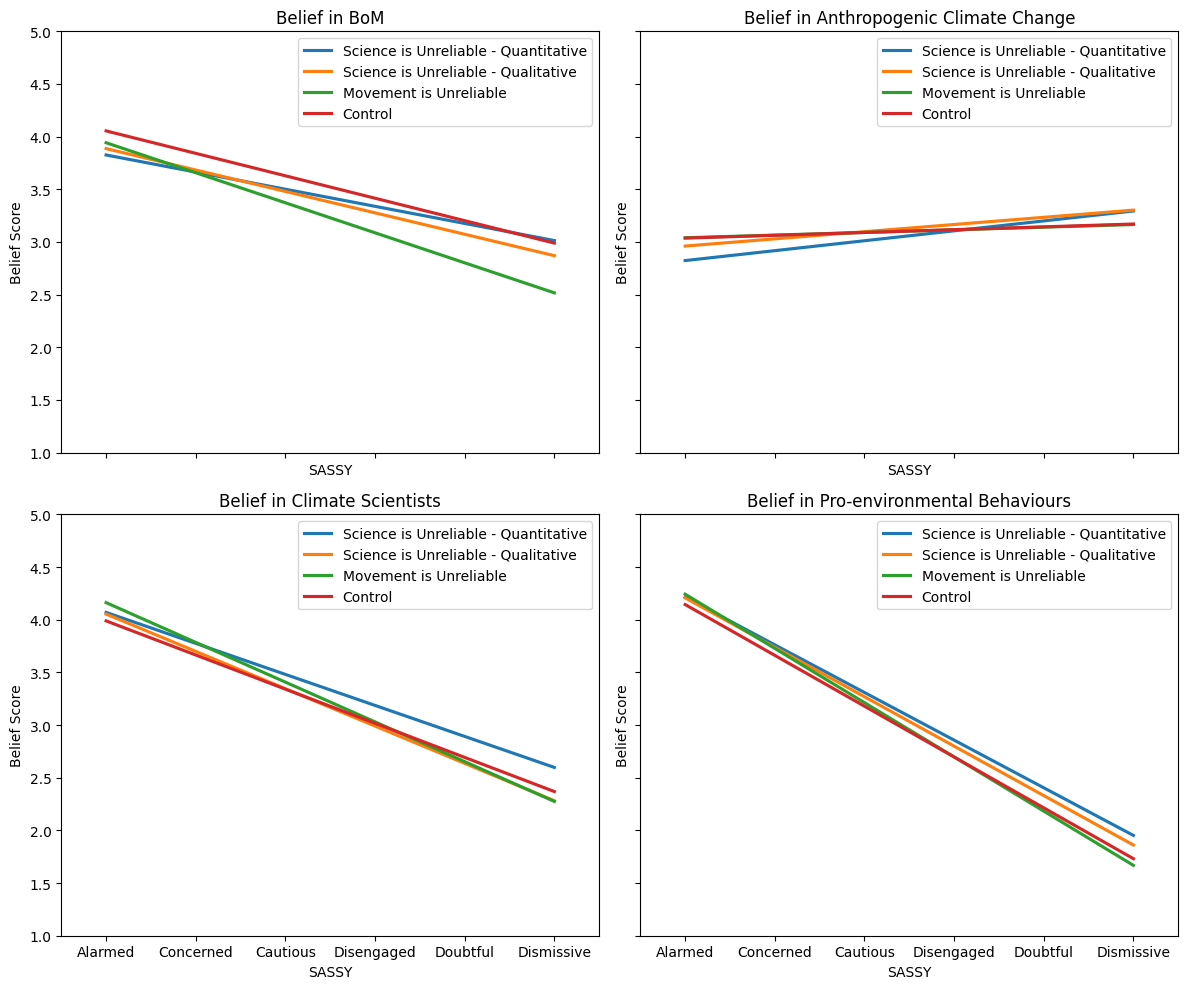

In [4]:
# Define the categories and their corresponding positions on the x-axis
categories = ['Alarmed', 'Concerned', 'Cautious', 'Disengaged', 'Doubtful', 'Dismissive']
positions = range(1, len(categories) + 1)

# Group the data by 'Block'
groups = df.groupby('Block')

# Columns to plot
columns_to_plot = ['Belief in BoM', 'Belief in Anthropogenic Climate Change', 'Belief in Climate Scientists','Belief in Pro-environmental Behaviours']  # Add more columns if needed

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Plot the regression lines for each column and group
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    for name, group in groups:
        # Perform linear regression
        sns.regplot(x='SASSY', y=column, data=group, scatter=False, ci=None, ax=ax, label=f'{column} - Block {name}')

    # Add labels and title
    ax.set_ylabel('Belief Score')
    ax.set_title (f'{column}')
    
    # Set y-axis limits
    ax.set_ylim(1, 5)  # Set the y-axis limits from 1 to 5

    # Set x-axis limits and labels
    ax.set_xlim(positions[0] - 0.5, positions[-1] + 0.5)
    ax.set_xticks(positions)
    ax.set_xticklabels(categories)

    # Set legend
    legend_labels = ['Science is Unreliable - Quantitative', 'Science is Unreliable - Qualitative', 'Movement is Unreliable', 'Control']
    ax.legend(legend_labels)

# Remove empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
fig1 = plt.gcf()
plt.tight_layout()
plt.xlabel('SASSY')
plt.show()
fig1.savefig('tessstttyyy.png', dpi=100)



#### Plot x Populism

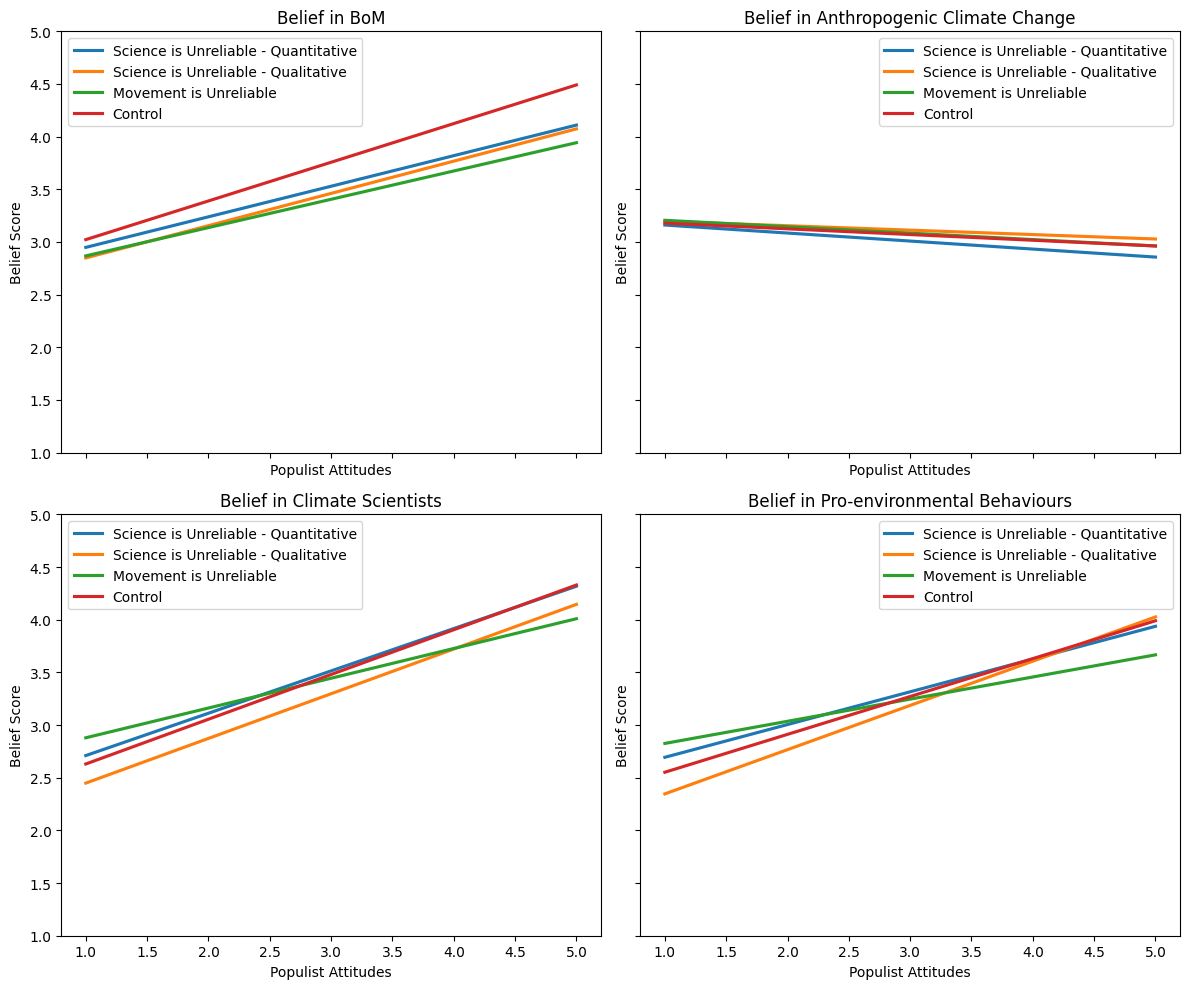

In [5]:
# Group the data by 'Block'
groups = df.groupby('Block')

# Columns to plot
columns_to_plot = ['Belief in BoM', 'Belief in Anthropogenic Climate Change', 'Belief in Climate Scientists','Belief in Pro-environmental Behaviours']  # Add more columns if needed

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Plot the regression lines for each column and group
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    for name, group in groups:
        # Perform linear regression
        sns.regplot(x='Q40', y=column, data=group, scatter=False, ci=None, ax=ax, label=f'{column} - Block {name}')

    # Add labels and title
    ax.set_ylabel('Belief Score')
    ax.set_title(f'{column}')
    ax.set_xlabel('Populist Attitudes')
    
    # Set y-axis limits
    ax.set_ylim(1, 5)  # Set the y-axis limits from 1 to 5


    # Set legend
    legend_labels = ['Science is Unreliable - Quantitative', 'Science is Unreliable - Qualitative', 'Movement is Unreliable', 'Control']
    ax.legend(legend_labels)

# Remove empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show

plt.savefig('linear_regression_plots_Populism.png', dpi=300)


#### Plot x Populist attitude average 

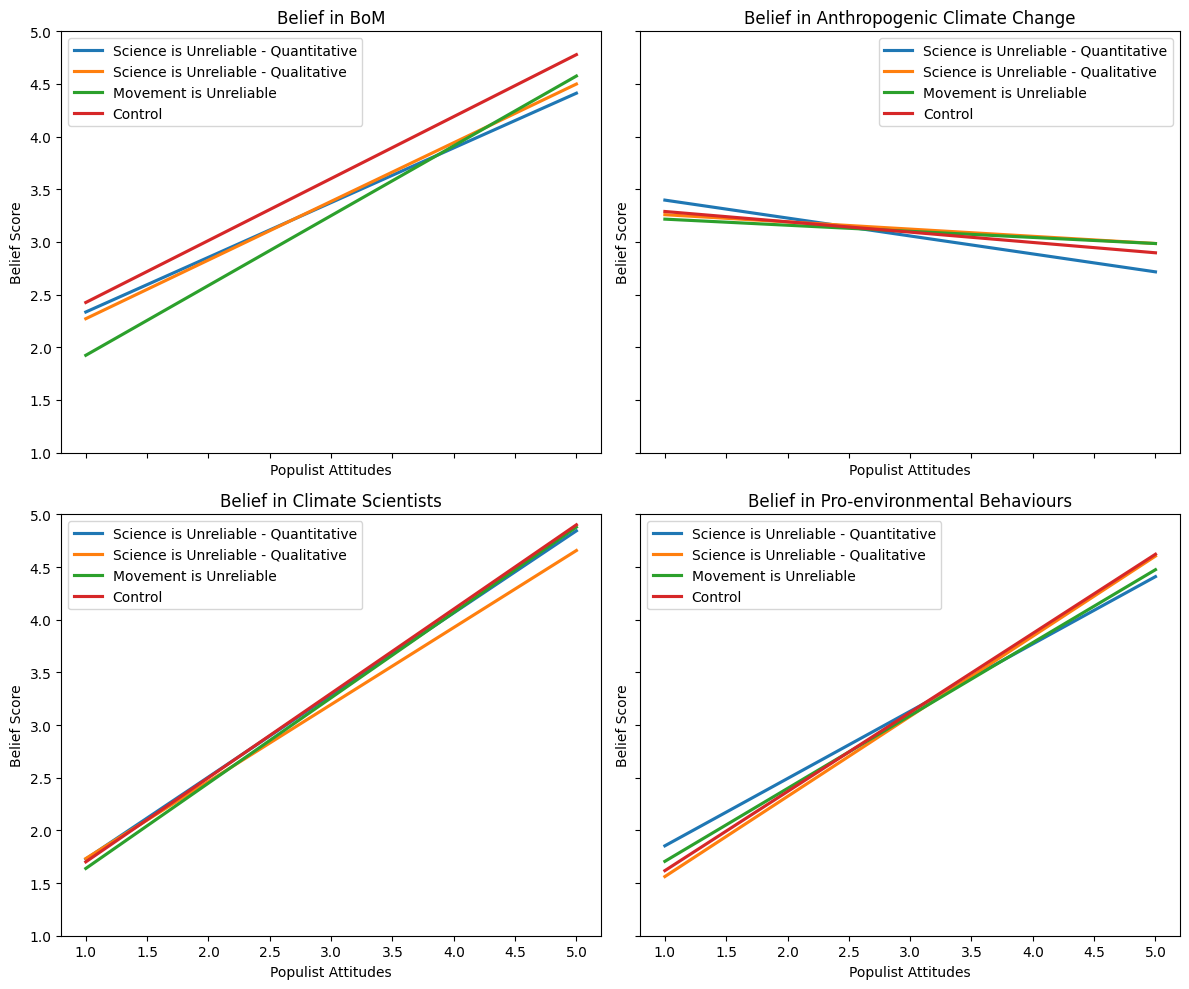

In [6]:
# Group the data by 'Block'
groups = df.groupby('Block')

# Columns to plot
columns_to_plot = ['Belief in BoM', 'Belief in Anthropogenic Climate Change', 'Belief in Climate Scientists','Belief in Pro-environmental Behaviours']  # Add more columns if needed

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Plot the regression lines for each column and group
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    for name, group in groups:
        # Perform linear regression
        sns.regplot(x='populism', y=column, data=group, scatter=False, ci=None, ax=ax, label=f'{column} - Block {name}')

    # Add labels and title
    ax.set_ylabel('Belief Score')
    ax.set_title(f'{column}')
    ax.set_xlabel('Populist Attitudes')
    
    # Set y-axis limits
    ax.set_ylim(1, 5)  # Set the y-axis limits from 1 to 5


    # Set legend
    legend_labels = ['Science is Unreliable - Quantitative', 'Science is Unreliable - Qualitative', 'Movement is Unreliable', 'Control']
    ax.legend(legend_labels)

# Remove empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show

plt.savefig('linear_regression_plots_Populism2.png', dpi=300)